<a href="https://colab.research.google.com/github/yuukicammy/automatic-watermark-detection/blob/gcolab/Watermarking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Colabolatory Setup
Mount the Google Drive that contains the source code and wartermarked image files.

---



In [15]:
#### predefined parameters ###
# Google Drive directory that contains the source code and wartermarked image files.
wdir = '/MyDrive/automatic-watermark-detection'

# the directory that containes the wartermarked images.
# please speficy the relative path from 'wdir'
wartermkarked = 'wartermarked_images'

# the image size (pixels) to be used during processing.
width = 500
height = 500

In [16]:
# mount Google Drive
from google.colab import drive 
drive.mount('/content/drive')

wdir = '/content/drive' + wdir

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# change working directory
# please specify your Google Drive directory that contains the target source code and wartermarked image files.
%cd $wdir
%pwd
!ls

/content/drive/MyDrive/automatic-watermark-detection
array.npz				 references.txt
closed-form-matting			 Resized
coco_dataset				 resize.py
final					 src
main_cocoset.py				 wartermarked_images
main.py					 wartermarked_images_resized
Matting-Levin-Lischinski-Weiss-PAMI.pdf  Watermarking.ipynb
README.md				 watermark.png


Resize the target wartermarked images.

In [26]:
import os, cv2, warnings
forldername = os.path.join(wdir, wartermkarked)
resizeddir = os.path.join(wdir, wartermkarked +'_resized')

if not os.path.exists(forldername):
   warnings.warn("{} does not exist.".format(forldername), UserWarning)

if not os.path.exists(resizeddir):
   os.mkdir(resizeddir)

original_shape = [] # (width, height, channel)
for r, dirs, files in os.walk(forldername):
    # Get all the images
    for file in files:
        img = cv2.imread(os.sep.join([r, file]))
        if img is not None:
          original_shape.append(img.shape)
          print('original shape: {}'.format(img.shape))
          img = cv2.resize(img,(width, height))
          print('resized shape:  {}'.format(img.shape))
          cv2.imwrite(os.path.join(resizeddir, file), img)
        else:
            print("%s not found." % (file))

print("Loaded {} images.".format(len(images)))

original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
original shape: (500, 500, 3)
resized shape:  (500, 500, 3)
Loaded 10 images.


### Automatic watermark removal
This is the Jupyter notebook for automatic watermark removal code.
We follow the scripts till watermark estimation and then try to solve the watermarking problem.

Computing gradients.
Computing median gradients.


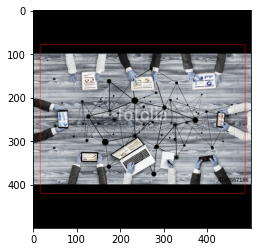

In [32]:
%matplotlib inline
from src import *

gx, gy, gxlist, gylist = estimate_watermark(resizeddir)

est = poisson_reconstruct(gx, gy)
cropped_gx, cropped_gy = crop_watermark(gx, gy)
est2 = poisson_reconstruct(cropped_gx, cropped_gy)

# random photo
# img = cv2.imread(first_image_path)
im, start, end = watermark_detector(img, cropped_gx, cropped_gy)

plt.imshow(im)
plt.show()

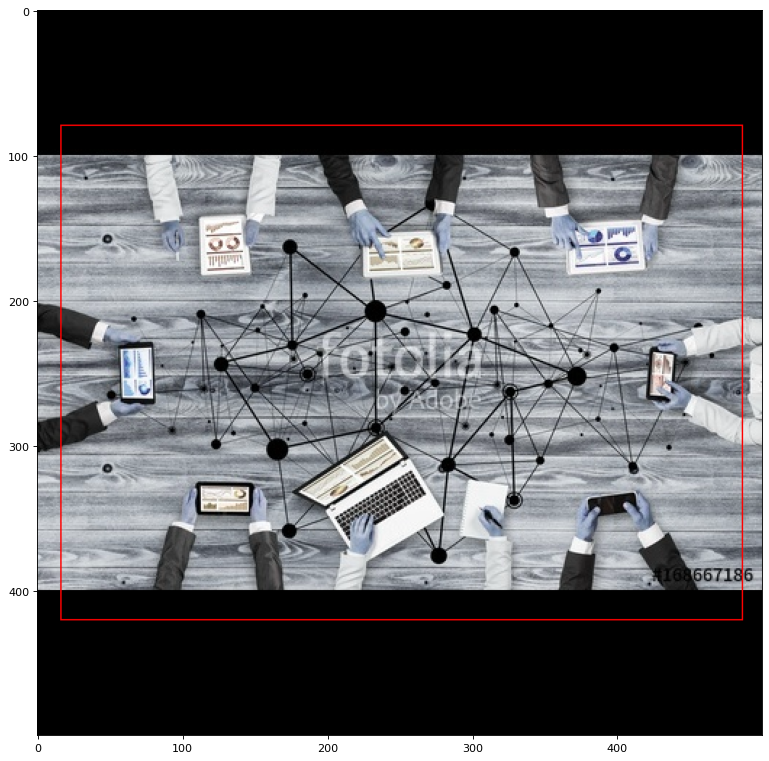

In [33]:
plt.figure(figsize=(12, 12), dpi= 80, facecolor='w', edgecolor='k')
plt.imshow(im)

In [34]:
print(cropped_gx.shape, cropped_gy.shape, est.shape, est2.shape)
print(im.shape, start, end)

(341, 470, 3) (341, 470, 3) (500, 500, 3) (341, 470, 3)
(500, 500, 3) (79, 16) (341, 470)


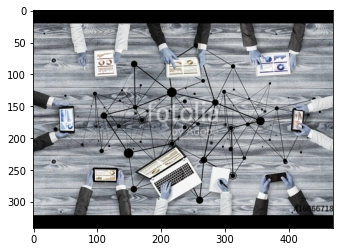

In [35]:
plt.imshow(img[start[0]:(start[0]+end[0]), start[1]:(start[1]+end[1]), :])

In [51]:
'''
This is the part where we get all the images, extract their parts, and then add it to our matrix
'''
num_images = len(gxlist)
images_cropped = np.zeros((num_images,) + cropped_gx.shape)

# Store all the watermarked images
# start, and end are already stored
# just crop and store image
image_paths = []
_s, _e = start, end
index = 0

# Iterate over all images
for r, dirs, files in os.walk(resizeddir):
    for file in files:
        _img = cv2.imread(os.sep.join([r, file]))
        if _img is not None:
            # estimate the watermark part
            image_paths.append(os.sep.join([r, file]))
            _img = _img[_s[0]:(_s[0]+_e[0]), _s[1]:(_s[1]+_e[1]), :]
            # add to list images
            images_cropped[index, :, :, :] = _img
            index+=1
        else:
            print("%s not found."%(file))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

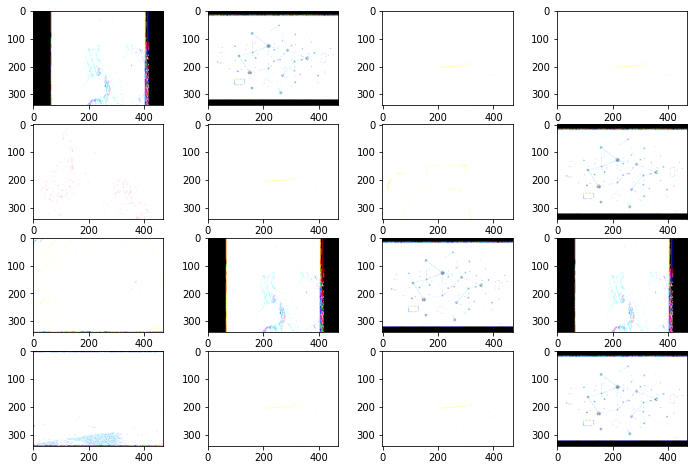

In [54]:
# Print some random indices extracted
N = 4
random_indices = np.random.randint(index, size=(N*N,))
fig, axes = plt.subplots(N, N, figsize=(12, 8))
for i, val in enumerate(random_indices):
  axes[int(i/N), i%N].imshow(images_cropped[val])

### Image reconstruction
Here comes the tougher part. We have an initial estimate for the watermark `Wm, cropped_gx, cropped_gy` and `est`. Using this, we solve the problem of Multi-image matting and reconstruction. We have a list of images, `images_cropped`, and we have to estimate `W` and `alpha` by reiterating the following 3 steps: 
- Image-Watermark detection
- Watermark update
- Matte update

Finally, we do a Matte and blend factor initialization to determine the constant and normalized matte.

In [58]:
import tensorflow as tf
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

In [59]:
# helpers that are going to be useful here
sobel_x = tf.constant([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], tf.float32)
sobel_y = tf.transpose(sobel_x)

sobel_x_filter = tf.stack([sobel_x, sobel_x, sobel_x])
sobel_x_filter = tf.stack([sobel_x_filter, sobel_x_filter, sobel_x_filter])

sobel_y_filter = tf.stack([sobel_y, sobel_y, sobel_y])
sobel_y_filter = tf.stack([sobel_y_filter, sobel_y_filter, sobel_y_filter])

def phi_func(mtensor, epsilon=0.001):
    return tf.sqrt(mtensor + epsilon**2)
    
# E_data
def E_data(I, W, J, alpha):
    est_error = tf.multiply(alpha, W) + tf.multiply(1-alpha, I) - J
    est_error = phi_func(tf.square(est_error))
    est_error = tf.reduce_sum(est_error)
    return est_error

# regularizer term for I, W
def E_reg(I, alpha):
    alpha_ = tf.expand_dims(alpha, 0)
    ax = tf.nn.conv2d(alpha_, sobel_x_filter, strides=[1, 1, 1, 1], padding="SAME")
    ay = tf.nn.conv2d(alpha_, sobel_y_filter, strides=[1, 1, 1, 1], padding="SAME")
    Ix2 = tf.square(tf.nn.conv2d(I, sobel_x_filter, strides=[1, 1, 1, 1], padding="SAME"))
    Iy2 = tf.square(tf.nn.conv2d(I, sobel_y_filter, strides=[1, 1, 1, 1], padding="SAME"))
    est_error = tf.multiply(tf.abs(ax), Ix2) + tf.multiply(tf.abs(ay), Iy2)
    est_error = tf.reduce_sum(phi_func(est_error))
    return est_error

# regularization term for alpha
def E_reg_alpha(alpha):
    alpha_ = tf.expand_dims(alpha, 0)
    ax2 = tf.square(tf.nn.conv2d(alpha_, sobel_x_filter, strides=[1, 1, 1, 1], padding="SAME"))
    ay2 = tf.square(tf.nn.conv2d(alpha_, sobel_y_filter, strides=[1, 1, 1, 1], padding="SAME"))
    est_error = tf.reduce_sum(phi_func(ax2 + ay2))
    return est_error

# fidelity term
# W = all watermarks
def E_f(alpha, W, W_m):
    aW = tf.multiply(alpha, W)
    # find edge map of alpha*W
    aWx = tf.nn.conv2d(aW, sobel_x_filter, strides=[1, 1, 1, 1], padding="SAME")
    aWy = tf.nn.conv2d(aW, sobel_y_filter, strides=[1, 1, 1, 1], padding="SAME")
    aW_ = tf.sqrt(tf.square(aWx) + tf.square(aWy))
    
    # find edge map of W_m
    W_m__ = tf.expand_dims(W_m, 0)
    W_mx = tf.nn.conv2d(W_m__, sobel_x_filter, strides=[1, 1, 1, 1], padding="SAME")
    W_my = tf.nn.conv2d(W_m__, sobel_y_filter, strides=[1, 1, 1, 1], padding="SAME")
    W_m_ = tf.sqrt(tf.square(W_mx) + tf.square(W_my))
    
    return tf.reduce_sum(phi_func(tf.square(aW_ - W_m_)))

# auxiliary term
def E_aux(W, W_k):
    return tf.reduce_sum(tf.abs(W - W_k))


# We try to use Tensorflow to perform the 3 steps
def image_watermark_decompose_model(num_images, m, n, chan=3, l_i=1, l_w=1, l_alpha=1, beta=1, gamma=1):
    # We have the following parameters
    # num_images = number of images, m, n, number of channels
    # lambda_i, lambda_w, lambda_alpha, beta, and gamma are parameters
    # Input to network: 
    #    J(k) = (num_images, m, n, chan) -> all the images
    #    W_m = (m, n, chan)   -> estimate of the watermark obtained before
    #    W_median =   (m, n, chan)   -> new estimate of W
    #    alpha = (m, n, chan) -> estimate of alpha matte
    # Entities to estimate
    #    I(k) = (num_images, m, n, chan) -> all watermarked images
    #    W(k) = (num_images, m, n, chan) -> all watermarks
    
    # All placeholders
    J = tf.placeholder(tf.float32, shape=(num_images, m, n, chan), name='J')
    alpha = tf.placeholder(tf.float32, shape=(m, n, chan), name='alpha')
    W_m = tf.placeholder(tf.float32, shape=(m, n, chan), name='W_m')
    W_median = tf.placeholder(tf.float32, shape=(m, n, chan), name='W_median')
    
    # All variables
    I = tf.Variable(np.random.randn(num_images, m, n, chan), name='I', dtype=tf.float32)
    W = tf.Variable(np.random.randn(num_images, m, n, chan), name='W', dtype=tf.float32)
    
    # compute loss
    loss = E_data(I, W, J, alpha) + l_i*E_reg(I, alpha) + l_w*E_reg(W, alpha) \
            + beta*E_f(alpha, W, W_m) + gamma*E_aux(W_median, W)
    
    optimizer = tf.train.GradientDescentOptimizer(0.01).minimize(loss)
    return {
        'J': J,
        'alpha': alpha,
        'W_m': W_m,
        'W_median': W_median, 
        'I': I,
        'W': W,
        'loss': loss,
        'step': optimizer,
    }
    
    

In [60]:
num_images, m, n, chan = images_cropped.shape
model = image_watermark_decompose_model(num_images, m, n, chan)

AttributeError: ignored

In [ ]:
# define the variables
# plt.imshow(PlotImage(est2))
W_m = est2
J = images_cropped
I = np.random.randn(num_images, m, n, chan)
alpha = np.random.rand(m, n, chan)
W_median = W_m.copy()
W = np.stack([W_m for _ in xrange(num_images)])
print
saver = tf.train.Saver()
with tf.Session() as sess:
    for i in xrange(100):
        print("Start")
        _, loss = sess.run([model['step'], model['loss']], feed_dict={
            model['J']: J,
            model['alpha']: alpha,
            model['W_m']: W_m,
            model['W_median']: W_median,
        })
        print(loss)
    
